# CMPE547 - HW4

In [2]:
from IPython.display import Image

## 1) Fake/fair coin

Problem: Given a sequence of coin tosses $X = \{x^{(n)}\}_{n=1\dots N}$, determine if the coin is fair or fake. Take the prior probability in the form: 0.5Beta(20,3) + 0.5Beta(3,20).

This problem can be modeled as follows:

$$\begin{eqnarray}
\pi_1|m & \sim & \left\{ \begin{array}{cc} \delta(\pi_1 - 0.5) & m = 0\\ 0.5*(\mathcal{B}(\pi; 20, 3) + \mathcal{B}(\pi; 3,20 ))  & m = 1 \end{array} \right.
\end{eqnarray}$$

For $n = 1\dots N$

$$\begin{eqnarray}
x^{(n)}| \pi_1 \sim \mathcal{BE}(x; \pi_1)
\end{eqnarray}$$

where 
- m indicates if the coin is fake or not. If m=0, the coin is fair. Else, it is fake. 
- a fair coin has an arbitrary probability $\pi_1$ between 0 and 1.
- a fair coin has $\pi_1=0.5$


The aim is to calculate the marginal likelihoods for $m=0$ and $m=1$ : $P(x^{(n)}|m)$ 

The Bayesian DAG of the model is illustrated below.

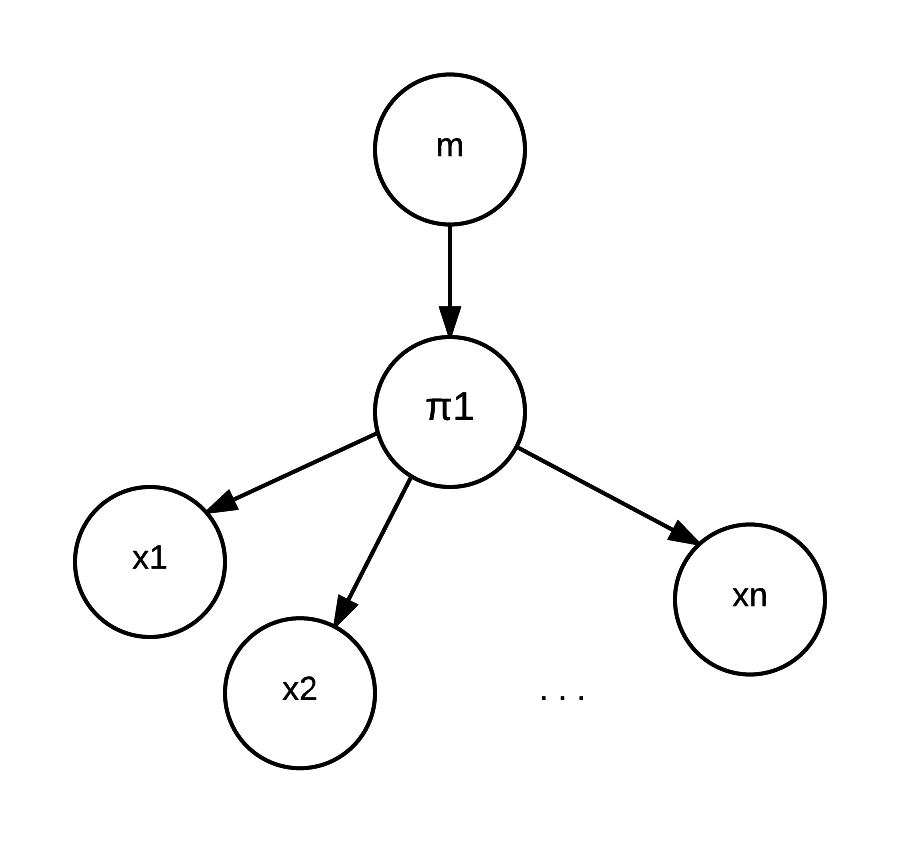

In [3]:
Image(filename='d1.png', width='300px') 

Hence,

$$\begin{eqnarray}
p(x^{(n)}| m) & = & \int d\pi_1 p(x^{(n)} | \pi_1) p(\pi_1|m)
\end{eqnarray}$$

**Case 1: Not Fake **

$$\begin{eqnarray}
m & = & 0 \\
p(\pi_1|m) & = & \delta(\pi_1 - 0.5) \\
p(x^{(n)}| m)  & = & \int d\pi_1 p(x^{(n)} | \pi_1)\delta(\pi_1 - 0.5)\\
\end{eqnarray}$$

Only for $\pi_1 = 0.5$, the integral gives yields non-zero values. Thus,

$$\begin{eqnarray}
p(x^{(n)}| m)  & = & \prod_{n=1}^N \left(\frac{1}{2}\right)^{x^{(n)}} \left(\frac{1}{2}\right)^{1-x^{(n)}} \\
 & = & \prod_{n=1}^N \left(\frac{1}{2}\right) \\
 & = & \frac{1}{2^N}
\end{eqnarray}$$

**Case 2: Fake**

$$\begin{eqnarray}
m & = & 1 \\
p(\pi_1|m) & = & 0.5*(\mathcal{B}(\pi; 20, 3) + \mathcal{B}(\pi; 3,20 )) \\
p(x^{(n)}| m)  & = & \int d\pi_1 p(x^{(n)} | \pi_1)*0.5*(\mathcal{B}(\pi; 20, 3) + \mathcal{B}(\pi; 3,20 ))\\
p(x^{(n)}| m)  & = & 0.5 * \int d\pi_1 (p(\pi_1; 20, 3) + p(\pi_1; 3, 20)) \prod_{n=1}^{N} p(x^{(n)}| \pi_1) \\
p(x^{(n)}| m)  & = & 0.5 * \int d\pi_1 \left(\prod_{n=1}^N \pi_1^{x^{(n)}} \left(1-\pi_1\right)^{1-x^{(n)}}  \right)  (\mathcal{B}(\pi; 20, 3) + \mathcal{B}(\pi; 3, 20))  \\
p(x^{(n)}| m)  & = & 0.5 * \left( \left(\int d\pi_1 \left(\prod_{n=1}^N \pi_1^{x^{(n)}} \left(1-\pi_1\right)^{1-x^{(n)}}  \right) \mathcal{B}(\pi; 20, 3) \right) + \left( \int d\pi_1 \left(\prod_{n=1}^N \pi_1^{x^{(n)}} \left(1-\pi_1\right)^{1-x^{(n)}}  \right) \mathcal{B}(\pi; 3, 20) \right) \right) \\
p(x^{(n)}| m)  & = & 0.5 * \left( \left( \frac{\Gamma(20 + 3)}{\Gamma(20)\Gamma(3)} \int d\pi_1 \left(1-\pi_1\right)^{c_0+20-1} \pi_1^{c_1+3-1} \right) + \left( \frac{\Gamma(3 + 20)}{\Gamma(3)\Gamma(20)} \int d\pi_1 \left(1-\pi_1\right)^{c_0+3-1} \pi_1^{c_1+20-1} \right) \right) \\ 
p(x^{(n)}| m)  & = & 0.5 * \left( \left( \frac{\Gamma(20 + 3)}{\Gamma(20)\Gamma(3)} \frac{\Gamma(c_0+20)\Gamma(c_1+3)}{\Gamma(c_0 + c_1 +20 + 3)} \right) + \left( \frac{\Gamma(3 + 20)}{\Gamma(3)\Gamma(20)} \frac{\Gamma(c_0+3)\Gamma(c_1+20)}{\Gamma(c_0 + c_1 +3 + 20)} \right) \right)
\end{eqnarray}$$


The log-odds of the marginal likelihoods is defined as follows:

$$\begin{eqnarray}
l(X) & = & \log\left( \frac{p(X|m = 0)}{p(X|m = 1)} \right) \\
l(X) & = & \log (p(X|m = 0)) - log (p(X|m = 1))
\end{eqnarray}$$

Therefore, 
- if $l(X)<0$, the coin is fake
- if $l(X)>0$, the coin is fair
- if $l(X)=0$, we cannot make any claims, as it's equally probably that the coin is fake or fair



In [4]:
import numpy as np
import scipy.special as sps # for gamma fct

## This code is a modified version of the corresponding one in ModelingExamples.ipynb written by Ali Taylan Cemgil.

def log_odds(c_0, c_1, a1, b1, a2, b2):
    # Total number of tosses
    N = c_0 + c_1
    
    M_fair = N*np.log(1/2) # since p(X|m=0)= (1/2)^N
    M_fake = (sps.gamma(a1+b1)*sps.gamma(c_0+a1)*sps.gamma(c_1+b1))/ (sps.gamma(a1)*sps.gamma(b1)*sps.gamma(N+a1 + b1)) 
    M_fake += (sps.gamma(a2+b2)*sps.gamma(c_0+a2)*sps.gamma(c_1+b2))/ (sps.gamma(a2)*sps.gamma(b2)*sps.gamma(N+a2 + b2)) 
    M_fake = 0.5* M_fake
    M_fake = np.log(M_fake)
    
    return M_fair - M_fake

# Number of Zeros observed (yazi)
c_0 = 9
# Number of Ones observed (tura)
c_1 = 1

# Prior
a1 = 20
b1 = 3
a2= 3
b2= 20


print('log_odds = ', log_odds(c_0, c_1, a1, b1, a2, b2) )

log_odds =  -2.80007084501


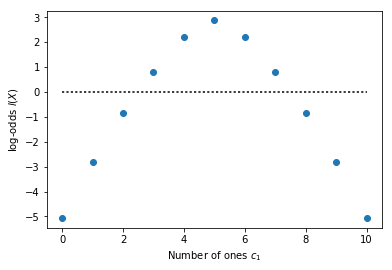

In [5]:
import matplotlib.pyplot as plt

## This code is a modified version of the corresponding one in ModelingExamples.ipynb written by Ali Taylan Cemgil.

a1 = 20
b1 = 3
a2 = 3
b2 = 20
N = 10

l = np.zeros(N+1)

for c in range(0,N+1):
    l[c] = log_odds(N-c, c, a1, b1, a2, b2)

plt.plot(range(0,N+1), l, 'o')
plt.plot(range(0,N+1), np.zeros(N+1), 'k:')
ax = plt.gca()
ax.set_xlabel('Number of ones $c_1$')
ax.set_ylabel('log-odds $l(X)$')
plt.show()

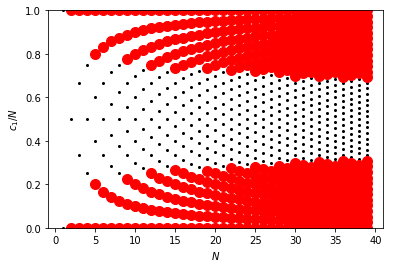

In [6]:
## This code is a modified version of the corresponding one in ModelingExamples.ipynb written by Ali Taylan Cemgil.

a1 = 20
b1 = 3
a2 = 3
b2 = 20

for N in range(1, 40):

    l = np.zeros(N+1);

    for c in range(0,N+1):
        l[c] = log_odds(N-c, c, a1, b1, a2, b2);
    
    
    idx = np.where( np.array(l)<0 )
    p = np.arange(0,N+1)/N
    plt.plot(N*np.ones_like(p), p, '.k',markersize=4)    
    plt.plot(N*np.ones_like(p[idx]), p[idx], '.r',markersize=20)
    

ax = plt.gca()
ax.set_ylim((0,1))
ax.set_xlabel('$N$')
ax.set_ylabel('$c_1/N$')
plt.show()

# 2) Changepoint

Problem: Suppose we observe the following dataset $x_t \in 0, 1$ for $t = 1 . . . 50$

00100100001000010010110011111111111011011111111111

Suppose we know that the data comes from the following model: 

$$\begin{eqnarray}
\pi_1 & \sim & \begin{array}{cc} \mathcal{B}(1,1) \end{array} \\ 
\pi_2 & \sim & \begin{array}{cc} \mathcal{B}(1,1) \end{array} \\
x_t & \sim & \left\{ \begin{array}{cc} \mathcal{BE}(x_t; \pi_1), & t <= n\\ \mathcal{BE}(x_t; \pi_2), & t>n \end{array} \right. \\ 
\end{eqnarray}$$

Derive, compute and plot the posterior probability of $p(n|x_{1:50})$ given that $n$ is a-priori uniform.

$n$ is the changing point. $n \sim \mathcal{U}(0,50) = p(n)$

We will calculate the posterior probability for each possible value of $n$. So, we will calculate $p(n=i|x_{1:50})$ where $i \in [0,50]$. 

If $i=0$, all data is coming from $\pi_2$ and if $i=50$, all data is coming from $\pi_1$.

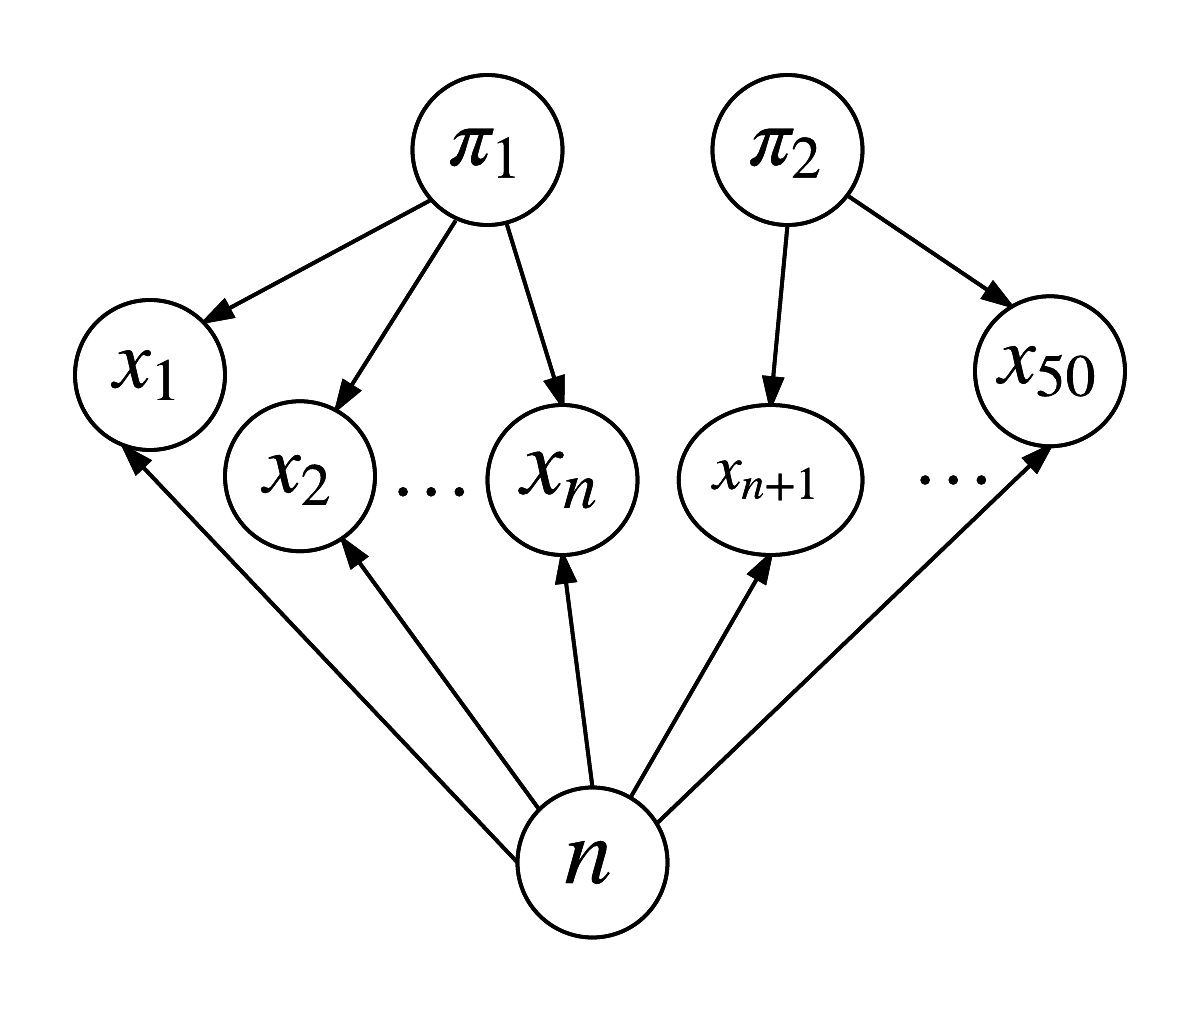

In [7]:
Image(filename='d2.png', width='300px') 

$$\begin{eqnarray}
p(n=i|x_{1:50}) & = & \frac{p(x_{1:50}|n=i)*p(n=i)}{p(x_{1:50})}  \\
p(n=i|x_{1:50}) & = & \frac{p(x_{1:50},n=i)}{p(x_{1:50})} \\
p(n=i|x_{1:50}) & = & \frac{\int \int d\pi_1 d\pi_2 p(x_{1:50},n=i,\pi_1, \pi_2)}{p(x_{1:50})} \\
p(n=i|x_{1:50}) & = & \frac{\int \int d\pi_1 d\pi_2 p(x_{1:50},n=i,\pi_1, \pi_2)}{\int \int d\pi_1 d\pi_2 \sum_{n=0}^{50} p(x_{1:50}, n, \pi_1, \pi_2)}
\end{eqnarray}$$

Using the Bayesian network above, we can factor the joint probabilities as follows:

$$\begin{eqnarray}
p(n=i|x_{1:50}) & = & \frac{\int \int d\pi_1 d\pi_2 p(x_{1:50}|n=i,\pi_1, \pi_2)p(\pi_1)p(\pi_2)p(n=i)}{\int \int d\pi_1 d\pi_2 \sum_{n=1}^{50} p(x_{1:50}|n, \pi_1, \pi_2)p(\pi_1)p(\pi_2)p(n)} \\ 
p(n=i|x_{1:50}) & = & \frac{(1/51)\int \int d\pi_1 d\pi_2 p(\pi_1)p(\pi_2) \prod_{t=1}^{i} (\pi_1)^{x_t}(1-\pi_1)^{1-x_t} \prod_{t=i+1}^{50} (\pi_2)^{x_t}(1-\pi_2)^{1-x_t}}{\int \int d\pi_1 d\pi_2 p(\pi_1)p(\pi_2) (1/51) \sum_{n=0}^{50} \prod_{t=1}^{n} (\pi_1)^{x_t}(1-\pi_1)^{1-x_t} \prod_{t=n+1}^{50}(\pi_2)^{x_t}(1-\pi_2)^{1-x_t}} \\
\end{eqnarray}$$

Define 

the number of 0s before a changepoint $n$ as $nb0$

the number of 1s before a changepoint $n$  as $nb1$

the number of 0s after a changepoint $n$  as $na0$

the number of 1s after a changepoint $n$  as $na1$

$$\begin{eqnarray}
p(n=i|x_{1:50}) & = & \frac{\int \int d\pi_1 d\pi_2 \mathcal{B}(1,1)\mathcal{B}(1,1) (\pi_1)^{ib1}(1-\pi_1)^{ib0} (\pi_2)^{ia1}(1-\pi_2)^{ia0}}{\sum_{n=0}^{50} \int \int d\pi_1 d\pi_2 \mathcal{B}(1,1)\mathcal{B}(1,1)(\pi_1)^{nb1}(1-\pi_1)^{nb0} (\pi_2)^{na1}(1-\pi_2)^{na0}} \\
p(n=i|x_{1:50}) & = & \frac{\int d\pi_1 \mathcal{B}(1,1) \frac{\Gamma(1+ia1)\Gamma(1+ia0)}{\Gamma(2+ia1+ia0)} (\pi_1)^{ib1}(1-\pi_1)^{ib0}}{ \sum_{n=0}^{50} \int d\pi_1 \mathcal{B}(1,1)(\pi_1)^{nb1}(1-\pi_1)^{nb0} \frac{\Gamma(1+na1)\Gamma(1+na0)}{\Gamma(2+na1+na0)} } \\
p(n=i|x_{1:50}) & = & \frac{\frac{\Gamma(1+ia1)\Gamma(1+ia0)}{\Gamma(2+ia1+ia0)} \int d\pi_1 \mathcal{B}(1,1)(\pi_1)^{ib1}(1-\pi_1)^{ib0}}{\sum_{n=0}^{50} \frac{\Gamma(1+na1)\Gamma(1+na0)}{\Gamma(2+na1+na0)} \int d\pi_1 \mathcal{B}(1,1)(\pi_1)^{na1}(1-\pi_1)^{na0}} \\
p(n=i|x_{1:50}) & = & \frac{\frac{\Gamma(1+ia1)\Gamma(1+ia0)}{\Gamma(2+ia1+ia0)} \frac{\Gamma(1+ib1)\Gamma(1+ib0)}{\Gamma(2+ib1+ib0)}}{\sum_{n=0}^{50} \frac{\Gamma(1+na1)\Gamma(1+na0)}{\Gamma(2+na1+na0)} \frac{\Gamma(1+nb1)\Gamma(1+nb0)}{\Gamma(2+nb1+nb0)}} \\
p(n=i|x_{1:50}) & \propto & \frac{\Gamma(1+ia1)\Gamma(1+ia0)}{\Gamma(2+ia1+ia0)} \frac{\Gamma(1+ib1)\Gamma(1+ib0)}{\Gamma(2+ib1+ib0)}\\
\end{eqnarray}$$


The programming part will be implemented by Wednesday midnight.